___
# PROJETO 1

## <font color='green'>Bruno Dratcu</font>
___

## <font color='green'>Os aposentados estão melhores que o restante de população?</font>

## Introdução

Quais as diferenças entre os aposentados de hoje em dia e os que ainda irão se aposentar?

lista para compreender:
 - aposentados de hoje em dia são aqueles com mais de 65 anos;
 - ver o curso mais elevado desses aposentados comparando quando eles começaram a trabalhar, a partir dai vamos ver suas rendas
 
 - após analisa-los, veremos os cursos mais elevados dos que irão se aposentar ainda;
 - comparar curso mais elevado deles, vemos as difernças dos aposentados, e ver quando eles começaram a trabalhar
 - pegarems suas rendas e comparar com os aposentados 
 
 - pegar a região na qual tem maior população de aposentados, e ver seus cursos mais elevados em que frequentaram


___
## Análise e Resultados

##NOTAS:

UF ; Unidade de Federação
V8005;3 ;Idade do morador 
V0302;2 ;Sexo
V6002;1 ;Rede de ensino 
V6007;2 ;Curso mais elevado que frequentou anteriormente 
V9891;1 ;Faixa de idade em que começou a trabalhar 
V4706;2 ;Posição na ocupação no trabalho principal 
V4707;1 ;Horas habitualmente trabalhadas por semana em todos os trabalhos 
V4719;12; Rendimento mensal de todos os trabalhos para pessoas de 10 anos ou mais de idade 

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from numpy import arange
import os


In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Bruno Dratcu\Desktop\2o Semestre\Ciencia dos Dados\CD\Projeto1


In [3]:
"""Vamos ler a estrutura da PNAD como um dataframe.
    São muitas colunas e precisamos usar a informação de tamanho para ler a PNAD de fato
    como uma base de tamanho fixo"""
estrutura = pd.read_table("pes_py.txt", sep=";")

In [4]:
estrutura.head()

,Coluna,Tamanho,Título
0,V0101,4,Ano de referência
1,UF,2,Unidade da Federação
2,V0102,6,Número de controle
3,V0103,3,Número de série
4,V0301,2,Número de ordem


In [5]:
# Se quiser uma leitura mais rápida, use o arquivo descompactado. Não esqueça de adicionar ao seu .gitignore
pnad2014 = pd.read_fwf("PES2014.txt", widths=estrutura.Tamanho, header=None)

# Se quiser economizar espaço, use o arquivo Zip
#pnad2014 = pd.read_fwf("PES2014.zip", widths=estrutura.Tamanho, header=None, compression="zip")

In [6]:
pnad2014.head()

,0,1,2,3,4,5,6,7,8,9,...,331,332,333,334,335,336,337,338,339,340
0,2014,11,15,1,1,2,19,8,1987,27,...,3.0,500.0,3.0,3,1.0,2.0,2.0,1.0,500.0,20160623
1,2014,11,15,1,2,4,19,1,1986,28,...,3.0,500.0,3.0,4,2.0,NaN,2.0,1.0,500.0,20160623
2,2014,11,15,1,3,2,14,5,2013,1,...,3.0,500.0,3.0,1,NaN,NaN,NaN,NaN,500.0,20160623
3,2014,11,15,2,1,2,8,4,1963,51,...,2.0,1150.0,4.0,2,1.0,2.0,2.0,1.0,1150.0,20160623
4,2014,11,15,2,2,4,6,11,1970,43,...,2.0,1150.0,4.0,3,1.0,2.0,2.0,1.0,1150.0,20160623


In [7]:
estrutura.columns

Index(['Coluna', 'Tamanho', 'Título'], dtype='object')

In [8]:
pnad2014.columns = estrutura.Coluna

In [9]:
pnad2014.head()

Coluna,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,V8005,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
0,2014,11,15,1,1,2,19,8,1987,27,...,3.0,500.0,3.0,3,1.0,2.0,2.0,1.0,500.0,20160623
1,2014,11,15,1,2,4,19,1,1986,28,...,3.0,500.0,3.0,4,2.0,NaN,2.0,1.0,500.0,20160623
2,2014,11,15,1,3,2,14,5,2013,1,...,3.0,500.0,3.0,1,NaN,NaN,NaN,NaN,500.0,20160623
3,2014,11,15,2,1,2,8,4,1963,51,...,2.0,1150.0,4.0,2,1.0,2.0,2.0,1.0,1150.0,20160623
4,2014,11,15,2,2,4,6,11,1970,43,...,2.0,1150.0,4.0,3,1.0,2.0,2.0,1.0,1150.0,20160623


In [52]:
tabela = pnad2014.loc[:, ["UF", "V8005", "V0302", "V9122", "V6002", "V6007", "V9891", "V4706", "V4707", "V4719"]]

#tabela

In [53]:
escolhas = pd.DataFrame()

escolhas["Idade"] = tabela.V8005
escolhas["Sexo"] = tabela.V0302
escolhas["Aposentados"] = tabela.V9122
escolhas["Rede de ensino"] = tabela.V6002
escolhas["Curso mais elevado que frequentou"] = tabela.V6007
escolhas["Faixa de idade em que começou a trabalhar"] = tabela.V9891
escolhas["Posição no trabalho"] = tabela.V4706
escolhas["Horas habitualmente trabalhadas por semana"] = tabela.V4707
escolhas["Rendimento"] = tabela.V4719

#escolhas

In [91]:
n = len(tabela)
escolhas.Regiões = pd.Series([""]*n)
escolhas.Curso_mais_elevado = pd.Series([""]*n)
escolhas.Geração = pd.Series([""]*n)
escolhas.Começou_a_trabalhar = pd.Series([""]*n)

#Filtrando Regiões
escolhas["Regiões"] = tabela.UF
norte = escolhas.Regiões[(tabela.UF>=11) & (tabela.UF<=17)] = "Norte"
nordeste = escolhas.Regiões[(tabela.UF>=21) & (tabela.UF<=29)] = "Nordeste"
sudeste = escolhas.Regiões[(tabela.UF>=31) & (tabela.UF<=35)] = "Sudeste"
sul = escolhas.Regiões[(tabela.UF>=41) & (tabela.UF<=43)] = "Sul"
centro_oeste = escolhas.Regiões[(tabela.UF>=50) & (tabela.UF<=53)] = "Centro-Oeste"

#_______________________________________________________________________________________________________________________________
#Filtrando aposentados
escolhas["Aposentados"] = tabela.V9122
velhos_aposentados = escolhas["Aposentados"][(tabela.V9122 == 2)] = "Aposentado"
nao_aposentados = escolhas["Aposentados"][(tabela.V9122 == 4)] = "Não aposentado"

#_______________________________________________________________________________________________________________________________
#Filtrando curso mais elevado
escolhas["Curso_mais_elevado"] = tabela.V6007
intelectual = escolhas["Curso_mais_elevado"][(tabela.V6007==5)|((tabela.V6007>=7) & (tabela.V6007<=9))] = "Estudos acima do E.M. completo"
nao_intelectual = escolhas["Curso_mais_elevado"][(tabela.V6007==6)|((tabela.V6007<5) & (tabela.V6007>=9))] = "Estudos abaixo do E.M."

#_______________________________________________________________________________________________________________________________
#Filtrando faixa de idade na qual começou a trabalhar
escolhas["Começou_a_trabalhar"] = tabela.V9891
maturo = escolhas["Começou_a_trabalhar"][(tabela.V9891>=4) & (tabela.V9891<=6)] = "Começou a trabalhar entre 18 a 29 anos"
imaturo = escolhas["Começou_a_trabalhar"][(tabela.V9891>=1) & (tabela.V9891<=3)] = "Começou a trabalhar entre 9 a 17 anos"

#_______________________________________________________________________________________________________________________________
#Filtrando adutos e idosos com E.M. completo e incompleto
velhos_espertos1 = escolhas.Aposentados[(escolhas.Aposentados == velhos_aposentados) & (escolhas.Curso_mais_elevado == intelectual) ] = "Aposentados que tiveram o E.M. completo (no minimo)"
velhos_burros1 = escolhas.Aposentados[(escolhas.Aposentados == velhos_aposentados) & (escolhas.Curso_mais_elevado == nao_intelectual) ] = "Aposentados que tiveram o E.M. incompleto"
adultos_espertos1 = escolhas.Aposentados[(escolhas.Aposentados == nao_aposentados) & (escolhas.Curso_mais_elevado == intelectual) ] = "Adultos que tiveram o E.M. completo (no minimo)"
adultos_burros1 = escolhas.Aposentados[(escolhas.Aposentados == nao_aposentados) & (escolhas.Curso_mais_elevado == nao_intelectual)] = "Adultos que tiveram o E.M. incompleto"

#velhos_espertos = escolhas.Curso_mais_elevado[(escolhas.Curso_mais_elevado == intelectual) & (escolhas.Aposentados == velhos_aposentados)] = "Aposentados que tiveram o E.M. completo (no minimo)"
#velhos_burros = escolhas.Curso_mais_elevado[(escolhas.Curso_mais_elevado == nao_intelectual) & (escolhas.Aposentados == velhos_aposentados)] = "Aposentados que tiveram o E.M. incompleto"
#adultos_espertos = escolhas.Curso_mais_elevado[(escolhas.Curso_mais_elevado == intelectual) & (escolhas.Aposentados == nao_aposentados)] = "Adultos que tiveram o E.M. completo (no minimo)"
#adultos_burros = escolhas.Curso_mais_elevado[(escolhas.Curso_mais_elevado == nao_intelectual) & (escolhas.Aposentados == nao_aposentados)] = "Adultos que tiveram o E.M. incompleto"
#_______________________________________________________________________________________________________________________________
#Filtrando adultos e idosos se começaram a trabalhar antes de se formar no E.M. ou depois
velhos_nao_precoce1 = escolhas.Aposentados[(escolhas.Aposentados == velhos_aposentados) & (escolhas.Começou_a_trabalhar == maturo) ] = "Aposentados que começaram a trabalha entre 18 a 29 anos"
velhos_precoce1 = escolhas.Aposentados[(escolhas.Aposentados == velhos_aposentados) & (escolhas.Começou_a_trabalhar == imaturo)] = "Aposentados que comceçaram a trablhar entre 9 a 18 anos"
adultos_nao_precoce1 = escolhas.Aposentados[(escolhas.Aposentados == nao_aposentados) & (escolhas.Começou_a_trabalhar == maturo)] = "Adultos que começaram a trabalha entre 18 a 29 anos"
adultos_precoce1 = escolhas.Aposentados[(escolhas.Geração == nao_aposentados) & (escolhas.Começou_a_trabalhar == imaturo)] = "Adultos que comceçaram a trablhar entre 9 a 18 anos"

#velhos_nao_precoce = escolhas.Começou_a_trabalhar[(escolhas.Começou_a_trabalhar == maturo) & (escolhas.Aposentados == velhos_aposentados)] = "Aposentados que começaram a trabalha entre 18 a 29 anos"
#velhos_precoce = escolhas.Começou_a_trabalhar[(escolhas.Começou_a_trabalhar == imaturo) & (escolhas.Aposentados == velhos_aposentados)] = "Aposentados que comceçaram a trablhar entre 9 a 18 anos"
#adultos_nao_precoce = escolhas.Começou_a_trabalhar[(escolhas.Começou_a_trabalhar == maturo) & (escolhas.Geração == adultos)] = "Adultos que começaram a trabalha entre 18 a 29 anos"
#adultos_precoce = escolhas.Começou_a_trabalhar[(escolhas.Começou_a_trabalhar == imaturo) & (escolhas.Geração == adultos)] = "Adultos que comceçaram a trablhar entre 9 a 18 anos"
#_______________________________________________________________________________________________________________________________
#Para o grafico conclusivo
#velho_conclusao = 
#adulto_conclusao = 


C:\Users\Bruno Dratcu\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Bruno Dratcu\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Bruno Dratcu\Anaconda3\lib\site-packages\ipykernel\__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Bruno Dratcu\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set o

In [57]:
escolhas.UF = tabela.UF.astype('category')
escolhas.UF.cat.categories = ('Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará',
                              'Amapá', 'Tocantins', 'Maranhão','Piauí', 'Ceará',
                              'Rio Grande do Norte','Paraíba', 'Pernambuco', 'Alagoas', 
                              'Sergipe', 'Bahia', 'Minas Gerais', 'Espírito Santo', 
                              'Rio de Janeiro', 'São Paulo', 'Paraná', 'Santa Catarina', 
                              'Rio Grande do Sul','Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 
                              'Distrito Federal')

escolhas.idade = tabela.V8005.astype('category')
#tabela.idade.cat.categories = ()

escolhas.sexo = tabela.V6002.astype('category')
escolhas.sexo.cat.categories = ("Homem", "Mulher")

escolhas.aposentados = tabela.V9122.astype('category')
escolhas.aposentados.cat.categories = ("Sim", "Não")

escolhas.rede_de_ensino = tabela.V6002.astype('category')
escolhas.rede_de_ensino.cat.categories = ("Pública", "Privada")

escolhas.curso_mais_elevado = tabela.V6007.astype('category')
escolhas.curso_mais_elevado.cat.categories = ('Elementar', 'Médio 1o ciclo', 'Médio 2o ciclo', 'Regular do E.F.',
                                            'Regular do E.M.', 'Supletivo do E.F.', 'Supletivo do E.M.', 'ensino superior',
                                            'Mestrado/doutorado', 'Alfabetização (jovens/adultos)', 'Creches', 
                                            'Classe de alfabetização', 'Maternal/jardim') 

escolhas.comecou_trabalho = tabela.V9891.astype('category')
escolhas.comecou_trabalho.cat.categories = ("Até 9 anos", "10 a 14 anos", "15 a 17 anos",
                                          "18 a 19 anos", "20 a 24 anos", "25 a 29 anos",
                                          "30 anos ou mais") 

escolhas.posicao_trabalho = tabela.V4706.astype('category')
escolhas.posicao_trabalho.cat.categories = ('Empregado com carteira de trabalho', 'Militar', 'Funcionário público',
                                          'Empregado sem carteira', 'Trabalhador doméstico com carteira', 'Trabalhador doméstico sem carteira', 
                                          'Conta própria', 'Empregador', 'Trabalhador na produção para o próprio consumo', 'Trabalhador na construção para o próprio uso',
                                          'Não remunerado')

escolhas.horas_trabalhadas = tabela.V4707.astype('category')
escolhas.horas_trabalhadas.cat.categories = ('Até 14 horas', '15 - 39 horas', 
                                           '40 - 44 horas', '45 - 48 horas', 
                                           '49 horas ou mais')

escolhas.rendimento_mensal = tabela.V4719.astype('category')
#tabela.rendimento_mensal.cat.categories = ()

#escolhas

Estes graficos a seguir, são graficos de barra e pizza/torta, porém não são muito uteis na minha analise, por isso comentei, assim este documento não fica poluido

In [14]:
reg = escolhas.Regiões.value_counts(True)*100
#reg

In [15]:
idade = escolhas.idade #.value_counts(True)#*1000
#idade

In [16]:
#idade.value_counts().plot.bar()

In [17]:
#idade.value_counts().plot.pie()

In [18]:
sexo = escolhas.sexo.value_counts(True)*100
#sexo

In [19]:
#plot = sexo.plot(kind='bar',title='Sexo',figsize=(6, 6), color=('pink','b'))
#plt.ylabel('Freq.Relativa (em%)')

In [20]:
#plot = sexo.plot(kind='pie',colors=('pink','b'),title='Sexo',autopct='%.1f',figsize=(6, 6))

In [21]:
ensi = escolhas.rede_de_ensino.value_counts(True)*100
#ensi

In [22]:
#plot = ensi.plot(kind='bar',title='Rede de Ensino',figsize=(6, 6), color=("g", "gold"))
#plt.ylabel('Freq.Relativa (em%)')

In [23]:
#plot = ensi.plot(kind='pie',colors=("g", "gold"), title='Rede de Ensino',autopct='%.1f',figsize=(6, 6))

In [24]:
curso = escolhas.curso_mais_elevado.value_counts(True)*100
#curso

In [25]:
#plot = curso.plot(kind='bar',title='Curso mais elevado',figsize=(6, 6)) #, color=("g", "gold"))
#plt.ylabel('Freq.Relativa (em%)')

In [26]:
#plot = curso.plot(kind='pie', title='Curso mais elevado',autopct='%.1f',figsize=(6, 6))

In [27]:
idade_trab = escolhas.comecou_trabalho.value_counts(True)*100
#idade_trab

In [28]:
#plot = idade_trab.plot(kind='bar',title='Idade em que começou a trabahar',figsize=(6, 6)) #, color=("g", "gold"))
#plt.ylabel('Freq.Relativa (em%)')

In [29]:
#plot = idade_trab.plot(kind='pie', title='Idade em que começou a trabahar',autopct='%.1f',figsize=(6, 6))

In [30]:
posi = escolhas.posicao_trabalho.value_counts(True)*100
#posi

In [31]:
#plot = posi.plot(kind='bar',title='Posição no trabalho',figsize=(6, 6)) #, color=("g", "gold"))
#plt.ylabel('Freq.Relativa (em%)')

In [32]:
#plot = posi.plot(kind='pie', title='Posição no trabalho',autopct='%.1f',figsize=(6, 6))

In [33]:
horas = escolhas.horas_trabalhadas.value_counts(True)*100
#horas

In [34]:
#plot = horas.plot(kind='bar',title='Horas trabalhadas',figsize=(6, 6)) #, color=("g", "gold"))
#plt.ylabel('Freq.Relativa (em%)')

In [35]:
#plot = horas.plot(kind='pie', title='Horas trabalhadas',autopct='%.1f',figsize=(6, 6))

In [36]:
rendi = escolhas[(escolhas.rendimento_mensal != 999999999999) & (~escolhas.rendimento_mensal.isnull())]
#rendi.describe()

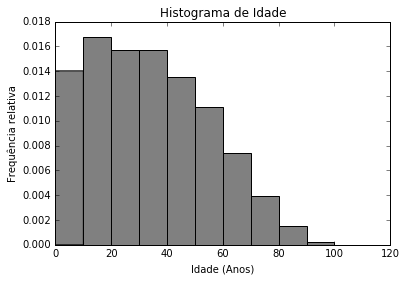

In [37]:
#Histograma das idades geral

faixa = arange(0,120,10)

plot = escolhas["Idade"].plot.hist(bins=faixa, normed=1, color="gray")
plt.title("Histograma de Idade")
plt.xlabel("Idade (Anos)")
plt.ylabel("Frequência relativa")

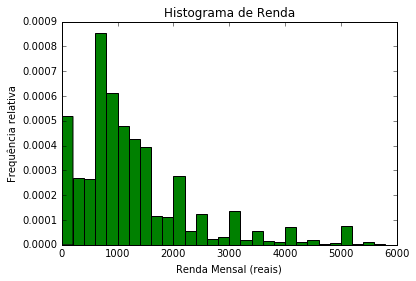

In [38]:
#Histograma da renda geral

renda_total = arange(0,6000,200)


plot = escolhas.Rendimento.plot.hist(bins=renda_total, normed=1, color="green")
plt.title("Histograma de Renda")
plt.xlabel("Renda Mensal (reais)")
plt.ylabel("Frequência relativa")

C:\Users\Bruno Dratcu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


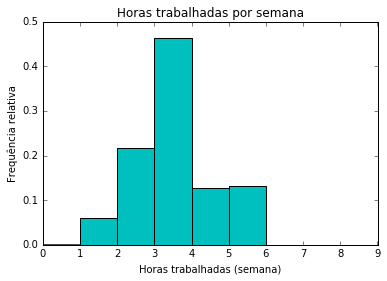

In [89]:
#Histograma das horas trabalhadas por semana

escolhas["Horas habitualmente trabalhadas por semana"].describe()

horas = arange(0,10)

plot = escolhas["Horas habitualmente trabalhadas por semana"].plot.hist(bins=horas, normed=1, color="c")
plt.title("Horas trabalhadas por semana")
plt.xlabel("Horas trabalhadas (semana)")
plt.ylabel("Frequência relativa")

C:\Users\Bruno Dratcu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


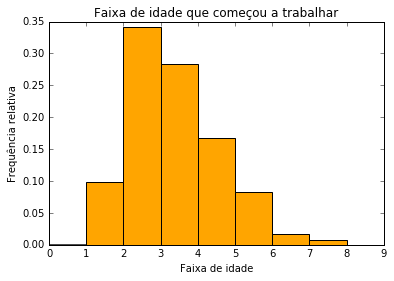

In [88]:
#Histograma da faixa de idade na qual começou a trabalhar

escolhas["Faixa de idade em que começou a trabalhar"].describe()

faixa_idade= arange(0,10)

plot = escolhas["Faixa de idade em que começou a trabalhar"].plot.hist(bins=faixa_idade, normed=1, color="orange")
plt.title("Faixa de idade que começou a trabalhar")
plt.xlabel("Faixa de idade")
plt.ylabel("Frequência relativa")

In [92]:
#Tabela que mostra a idade em que a pessoa começou a trabalhar com o curso mais elevado que ela completou

print('Tabela Cruzada por Idade em que começou a trabalhar vs Curso mais elevado (em %):')
tab1=pd.crosstab(escolhas["Começou_a_trabalhar"], escolhas["Curso_mais_elevado"], margins=True,rownames=['Idade em que começou a trabalhar'], colnames=['Curso mais elevado'])
tab12=(tab1/len(escolhas)*100).round(decimals=0)
tab12

Tabela Cruzada por Idade em que começou a trabalhar vs Curso mais elevado (em %):


Curso mais elevado,1.0,2.0,3.0,4.0,10.0,11.0,12.0,13.0,Estudos abaixo do E.M.,Estudos acima do E.M. completo,All
Idade em que começou a trabalhar,,,,,,,,,,,
7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Começou a trabalhar entre 18 a 29 anos,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,10.0,12.0
Começou a trabalhar entre 9 a 17 anos,3.0,1.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,16.0,33.0
All,4.0,1.0,0.0,14.0,0.0,0.0,0.0,0.0,1.0,26.0,45.0


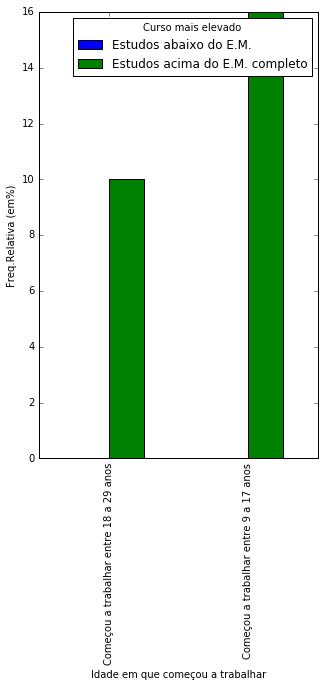

In [93]:
#Grafico que mostra a tabela acima

tabfim1 = tab12.iloc[-3:-1,-3:-1]
plot = tabfim1.plot(kind='bar', figsize=(5, 8))
plt.ylabel('Freq.Relativa (em%)')

In [94]:
tab12.describe()

Curso mais elevado,1.0,2.0,3.0,4.0,10.0,11.0,12.0,13.0,Estudos abaixo do E.M.,Estudos acima do E.M. completo,All
count,4.000000,4.00000,4.0,4.000000,4.0,4.0,4.0,4.0,4.00,4.000000,4.000000
mean,1.750000,0.50000,0.0,7.000000,0.0,0.0,0.0,0.0,0.25,13.000000,22.500000
std,2.061553,0.57735,0.0,7.023769,0.0,0.0,0.0,0.0,0.50,10.893423,20.273135
min,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000
25%,0.000000,0.00000,0.0,1.500000,0.0,0.0,0.0,0.0,0.00,7.500000,9.000000
50%,1.500000,0.50000,0.0,7.000000,0.0,0.0,0.0,0.0,0.00,13.000000,22.500000
75%,3.250000,1.00000,0.0,12.500000,0.0,0.0,0.0,0.0,0.25,18.500000,36.000000
max,4.000000,1.00000,0.0,14.000000,0.0,0.0,0.0,0.0,1.00,26.000000,45.000000


In [95]:
#Tabela que mostra a faixa de idade em que a pessoa começou a trabalhar com a sua idade atual (adulto ou aposentado)

print('Tabela Cruzada por Idade em que começou a trabalhar vs Idade (em %):')
tab2=pd.crosstab(escolhas["Começou_a_trabalhar"], escolhas["Aposentados"], margins=True,rownames=['Idade em que começou a trabalhar'], colnames=['Aposentados e não aposentados'])
tab21=(tab2/len(escolhas)*100).round(decimals=0)
tab21

Tabela Cruzada por Idade em que começou a trabalhar vs Idade (em %):


Aposentados e não aposentados,Aposentado,Não aposentado,All
Idade em que começou a trabalhar,,,
7.0,0.0,0.0,0.0
Começou a trabalhar entre 18 a 29 anos,0.0,14.0,14.0
Começou a trabalhar entre 9 a 17 anos,3.0,35.0,38.0
All,3.0,49.0,52.0


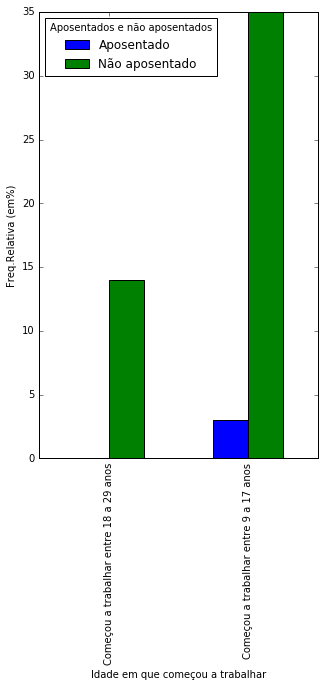

In [96]:
#Grafico que mostra a tabela acima

tabfim2 = tab21.iloc[-3:-1,-3:-1]
plot = tabfim2.plot(kind='bar', figsize=(5, 8))
plt.ylabel('Freq.Relativa (em%)')

In [97]:
tab21.describe()

Aposentados e não aposentados,Aposentado,Não aposentado,All
count,4.000000,4.000000,4.000000
mean,1.500000,24.500000,26.000000
std,1.732051,21.763884,23.380904
min,0.000000,0.000000,0.000000
25%,0.000000,10.500000,10.500000
50%,1.500000,24.500000,26.000000
75%,3.000000,38.500000,41.500000
max,3.000000,49.000000,52.000000


In [98]:
#Tabela que mostra o curso mais elevado que a pessoa completou com a sua idade atual (adulto ou aposentado)


print('Tabela Cruzada por Curso mais elevado vs Idade (em %):')
tab3=pd.crosstab(escolhas["Curso_mais_elevado"], escolhas["Aposentados"], margins=True,rownames=['Curso mais elevado'], colnames=['Aposentados e não aposentados'])
tab31=(tab3/len(escolhas)*100).round(decimals=0)
tab31

Tabela Cruzada por Curso mais elevado vs Idade (em %):


Aposentados e não aposentados,Aposentado,Não aposentado,All
Curso mais elevado,,,
1.0,4.0,4.0,9.0
2.0,1.0,1.0,2.0
3.0,1.0,0.0,1.0
4.0,1.0,18.0,18.0
10.0,0.0,0.0,0.0
11.0,0.0,0.0,0.0
12.0,0.0,0.0,0.0
13.0,0.0,0.0,0.0
Estudos abaixo do E.M.,0.0,1.0,1.0


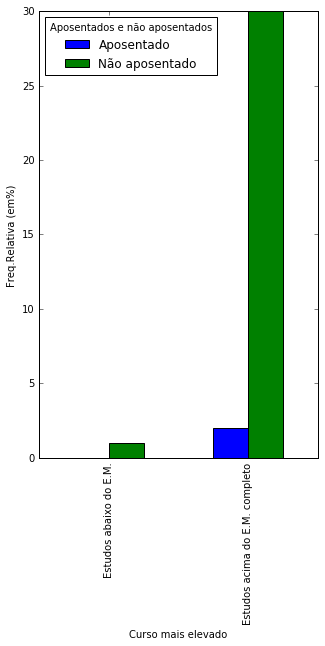

In [99]:
#Grafico que mostra a tabela acima

tabfim3 = tab31.iloc[-3:-1,-3:-1]
plot = tabfim3.plot(kind='bar', figsize=(5, 8))
plt.ylabel('Freq.Relativa (em%)')

In [100]:
tab31.describe()

Aposentados e não aposentados,Aposentado,Não aposentado,All
count,11.000000,11.000000,11.000000
mean,1.636364,9.818182,11.454545
std,2.730301,17.600103,19.901576
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000
75%,1.500000,11.000000,13.500000
max,9.000000,54.000000,63.000000


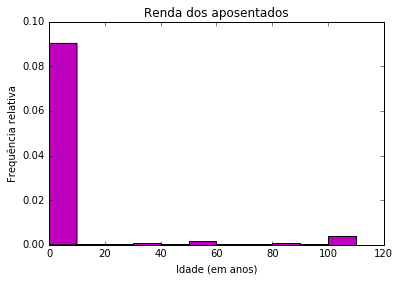

C:\Users\Bruno Dratcu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


count    1.018200e+04
mean     3.624043e+10
std      1.868970e+11
min      0.000000e+00
25%               NaN
50%               NaN
75%               NaN
max      1.000000e+12
Name: Rendimento, dtype: float64

In [75]:
#Histograma mostrando os aposentados que tiveram no minimo o E.M. completo, pela renda

renda_idosos = escolhas[(escolhas["Aposentados"] == velhos_aposentados)].Rendimento
faixa = arange(0,120,10)

plot = renda_idosos.plot.hist(bins=faixa, normed=1, color="m")
plt.title("Renda dos aposentados")
plt.xlabel("Idade (em anos)")
plt.ylabel("Frequência relativa")
plt.show()

renda_idosos.describe()

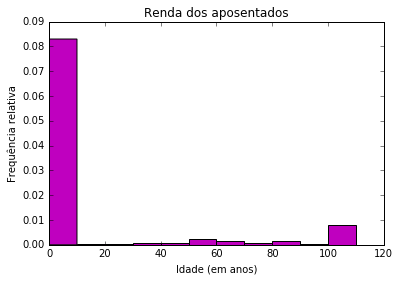

C:\Users\Bruno Dratcu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


count    1.664280e+05
mean     2.143870e+10
std      1.448420e+11
min      0.000000e+00
25%               NaN
50%               NaN
75%               NaN
max      1.000000e+12
Name: Rendimento, dtype: float64

In [101]:
renda_adultos = escolhas[(escolhas["Aposentados"] == nao_aposentados)].Rendimento
faixa = arange(0,120,10)

plot = renda_adultos.plot.hist(bins=faixa, normed=1, color="m")
plt.title("Renda dos aposentados")
plt.xlabel("Idade (em anos)")
plt.ylabel("Frequência relativa")
plt.show()

renda_adultos.describe()

In [ ]:
escolhas.boxplot(column=renda_adultos, by="Regiões")
plt.show()

In [ ]:
escolhas.boxplot(column="Idade", by="Regiões")
plt.show()

In [ ]:
#apenas por curiosidade

escolhas.boxplot(column="Rendimento", by=(escolhas.Aposentados == velhos_aposentados))
plt.show()

In [ ]:


renda_velhos_espertos = escolhas[(escolhas["Aposentados"] == velhos_espertos1)].Rendimento
faixa = arange(0,120,10)

plot = renda_velhos_espertos.plot.hist(bins=faixa, normed=1, color="m")
plt.title("Renda dos aposentados")
plt.xlabel("Idade (em anos)")
plt.ylabel("Frequência relativa")
plt.show()

renda_adultos.describe()

KeyError: 'Aposentados'

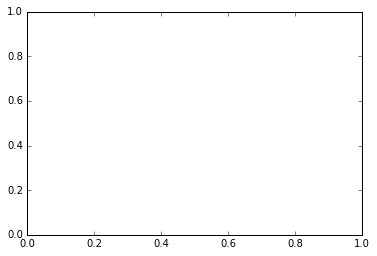

In [77]:
escolhas.plot.scatter(x='Aposentados', y='Idade', color='Red')
escolhas.plot.scatter(x='Aposentados', y='Começou_a_trabalhar', color='Red')
escolhas.plot.scatter(x='Aposentados', y='Curso_mais_elevado', color='Red')


def scatter_and_line(dataframe, column1, column2):
    """ Recebe um dataframe e o nome de suas duas colunas, e faz
        o scatterplot dos dois e tenta achar a reta de tendência
    """
    b = dataframe[column1].cov(dataframe[column2]) / dataframe[column1].var()
    a = dataframe[column2].mean() - b * dataframe[column1].mean()

    dataframe.plot.scatter(x=column1, y=column2, color='red')

    import matplotlib.pyplot as plt
    plt.plot((dataframe[column1].min(), dataframe[column2].max()), (a + b * dataframe[column1].min(), a + b * dataframe[column1].max()), color='blue')
    
    print("Coeficiente a: ", a)
    print("Coeficiente b: ", b)
    
    
scatter_and_line(Mundo, "X3", "X4")


In [ ]:
#A seguir: histogramas que mostrariam a conclusão final
faixa2 = arange(0,6000,200)
conclu2 = escolhas[(escolhas.Começou_a_trabalhar == "velho_conclusao")].Rendimento


plot = conclu2.plot.hist(bins=faixa2, color="green")

___
## Conclusão 

Descreva aqui suas conclusões!

Ao ver os graficos, é possivel notar em que a quantidade de adultos é, aproximadamente, 5 vezes maior em começar a trabalhar na faixa dos 18 anos a 29 do que os aposentados, e 3 vezes maior na faixa de 9 a 17 anos, e quantidade, tanto tem aposentados quanto em adultos, é maior para a faixa de 9 a 17 anos. Além disso, concluimos que a quantidade de adutos é 5 vezes maior que os aposentados na questão de ter estudos acima do E.M. completo.